In [2]:
import numpy as np
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input
from keras.models import Model
from keras.layers import Flatten
import os

Using TensorFlow backend.


Create feature Extractor based on Resnet50 pretrained on Imagenet weights

In [3]:
base_resnet = ResNet50(include_top=False, weights='imagenet',input_shape=(224,224,3), classes=1000)
flatFeaturesLayer = Flatten()(base_resnet.output)
featureExtractor = Model(inputs=base_resnet.input, outputs=flatFeaturesLayer)
featureExtractor.compile('sgd','mse')

In [4]:
datasetPath = '/DATA/cocostuf/images/'

In [5]:
imgpaths = [os.path.join(root, f) for root, _, files in os.walk(datasetPath) for f in files if f.endswith('.jpg')]

In [6]:
with open('week1/imgpaths.txt', 'w') as f:
    for b in imgpaths:
        f.write(b + '\n')
vectorsPath = 'week1/data/vectors/'        

In [7]:
def extractAndSaveVectorsForBatch(batchImgPaths):
    batchSize = len(batchImgPaths)
    batch = np.zeros((batchSize, 224,224,3), dtype=np.float)
    for i in range(0, batchSize):
        img = image.img_to_array(image.load_img(batchImgPaths[i], target_size=(224, 224)))
        batch[i] = preprocess_input(img)
    batchVectors = featureExtractor.predict_on_batch(batch).astype(np.float16)
    for i in range(0, batchSize):
        np.save(batchImgPaths[i].replace(datasetPath, vectorsPath)+'.npy', batchVectors[i])

In [9]:
batchSize = 64
printEvery = 8
imgCount = len(imgpaths)
for i in range(0, imgCount,batchSize):
    extractAndSaveVectorsForBatch(imgpaths[i:i+batchSize])
    if not i % printEvery*batchSize:
        print('extracted vectors for %s images of %s' % (str(min(i+batchSize,imgCount)), imgCount))
print('extracted vectors for every image')

extracted vectors for 64 images of 10000


extracted vectors for 384 images of 10000


extracted vectors for 704 images of 10000


extracted vectors for 1024 images of 10000


extracted vectors for 1344 images of 10000


extracted vectors for 1664 images of 10000


extracted vectors for 1984 images of 10000


extracted vectors for 2304 images of 10000


extracted vectors for 2624 images of 10000


extracted vectors for 2944 images of 10000


extracted vectors for 3264 images of 10000


extracted vectors for 3584 images of 10000


extracted vectors for 3904 images of 10000


extracted vectors for 4224 images of 10000


extracted vectors for 4544 images of 10000


extracted vectors for 4864 images of 10000


extracted vectors for 5184 images of 10000


extracted vectors for 5504 images of 10000


extracted vectors for 5824 images of 10000


extracted vectors for 6144 images of 10000


extracted vectors for 6464 images of 10000


extracted vectors for 6784 images of 10000


extracted vectors for 7104 images of 10000


extracted vectors for 7424 images of 10000


extracted vectors for 7744 images of 10000


extracted vectors for 8064 images of 10000


extracted vectors for 8384 images of 10000


extracted vectors for 8704 images of 10000


extracted vectors for 9024 images of 10000


extracted vectors for 9344 images of 10000


extracted vectors for 9664 images of 10000


extracted vectors for 9984 images of 10000


extracted vectors for every image


In [10]:
imgVectors = []
for imgpath in imgpaths:
    vectorpath = imgpath.replace(datasetPath, vectorsPath)+'.npy'
    imgVectors.append(np.load(vectorpath))
imgVectors = np.array(imgVectors)
print('loaded every image vector')

loaded every imgvector


In [11]:
import scipy
def cos_cdist(matrix, vector):
    v = vector.reshape(1, -1)
    return scipy.spatial.distance.cdist(matrix, v, 'cosine').reshape(-1)

In [62]:
imgpaths = np.array(imgpaths)
def findNearestImages(imgPath, topn=4):
    img = preprocess_input(image.img_to_array(image.load_img(imgPath, target_size=(224, 224))))
    img = np.expand_dims(img, axis=0)
    searchImgVector = featureExtractor.predict(img)[0]
    imgDistances = cos_cdist(imgVectors, searchImgVector)
    nearestIds = np.argsort(imgDistances)[:topn].tolist()
    print nearestIds
    nearestImgPaths = imgpaths[nearestIds]
    print nearestImgPaths
    return nearestImgPaths

In [52]:
searchImgPath = 'week1/imgs/sport1.jpg'
similarImagesPaths = findNearestImages(searchImgPath, topn=4)
similarimages = []
#print(similarImagesPaths)
for imgPath in similarImagesPaths:
    similarimages.append(image.load_img(imgPath, target_size=(224, 224)))
    

[176, 5905, 4630, 9471]
['/DATA/cocostuf/images/COCO_train2014_000000000431.jpg'
 '/DATA/cocostuf/images/COCO_train2014_000000233471.jpg'
 '/DATA/cocostuf/images/COCO_train2014_000000097858.jpg'
 '/DATA/cocostuf/images/COCO_train2014_000000142803.jpg']


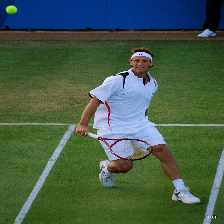

In [59]:
similarimages[1]